# Univariant Linear Regression From Scratch


In [1]:
# import all the necessary libraries
import pandas as pd

In [2]:
datapath= "D:/Machine Learning Datasets/Linear Regression/IceCreamData.csv"
data= pd.read_csv(datapath)

data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
data.columns


Index(['Temperature', 'Revenue'], dtype='object')

In [4]:
#let's plot the data points
import numpy as np
import matplotlib.pyplot as plt

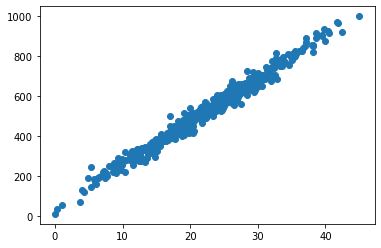

In [5]:
X= data['Temperature']
Y= data['Revenue']
plt.scatter(X,Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

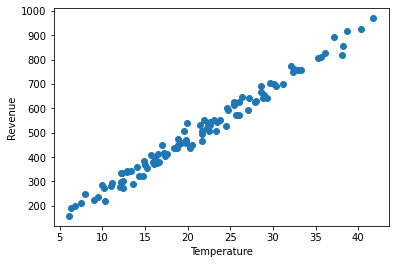

In [7]:
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.scatter(X_train,y_train)


In [113]:
#Now as our training data is ready we need to create a Linear regression model and it's related functions.

#computing cost
def compute_cost(w,b,X,Y):
    m=X.shape[0]
    
    cost=0
    for i in range(m):
        f_x=w*X[i]+b
        cost+=(f_x-Y[i])**2
    cost=(cost/(2*m))
    
#     print(cost)
#     plt.scatter(w,cost)
    return cost
    
    
    



In [114]:
# compute gardient descent

def compute_gradient(alpha,X,Y,w,b):
    m=X.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_xi=w*X[i]+b
        dj_dw_i=(f_xi-Y[i])*X[i]
        dj_db_i=f_xi-Y[i]
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    w=w-(alpha*dj_dw)
    b=b-(alpha*dj_db)
    
    return w,b
        

In [157]:
# import matplotlib.animation as animation

# # Define the update function for the animation
# def updatePlot(slope, intercept):
#     # Update the y-values of the line using the new slope and intercept
#     line.set_ydata(slope * X_train + intercept)
#     plt.draw()
#     plt.pause(0.001)



def showLineFit(w,b):

    line_x= np.linspace(X_train.min(),X_train.max(),100)
    line_y= w*line_x + b
    plt.scatter(X_train, y_train, color='blue', label='Data Points')
    plt.plot(line_x, line_y, color='red', label='Regression Line')
    plt.xlabel('Temperature')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

In [159]:
# predict function

def fit_line():
    w=0
    b=0
    alpha=0.003
    convergence=-1
    i=0
    while True:
        i+=1
        w,b=compute_gradient(alpha,X_train,y_train,w,b)
        cost=compute_cost(w,b,X_train,y_train)
        if convergence==w:
            break
        else:
            convergence=w
        if i%1000==0:
            print(w,b,cost)
#             showLineFit(w,b)
#             plt.pause(1)
#             updatePlot(w,b)
#             plt.show()
    return w,b,cost
    

In [160]:
# Create a figure and axis
# fig, ax = plt.subplots()
# line, = ax.plot(X_train, y_train, 'o')
w,b,cost=fit_line()


22.798946817274807 13.578560571881958 329.52324545052943
22.461656607663464 21.95078705979146 305.7955224986293
22.23824120881272 27.496409988545942 295.3849455349258
22.090254581803432 31.169737951225976 290.8172879920216
21.99223071287479 33.60288901374101 288.8132208301348
21.927301340039392 35.214567620488275 287.93393310954116
21.88429320841925 36.282116599038694 287.54814419473354
21.855805340684178 36.98924320407838 287.3788786820883
21.836935453118304 37.45763205143016 287.304613163637
21.824436354903572 37.76788499731005 287.272029046857
21.816157161101494 37.97339136444766 287.2577327127242
21.810673161469282 38.109515348103656 287.2514601729152
21.807040651748533 38.19968160029552 287.24870808589134
21.804634538007413 38.259406219102345 287.24750060324266
21.803040768470577 38.298966808623476 287.24697081826974
21.801985082160684 38.32517108207929 287.246738374253
21.801285813189136 38.34252835495272 287.24663638906344
21.80082262910691 38.354025522470394 287.24659164289596


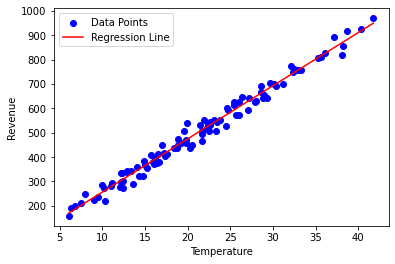

In [147]:
# now we have best fit line so we will plot.
showLineFit(w,b)

In [121]:
def predict(x,Y):
    predicted=[]
    m=x.shape[0]
    for i in range(m):
        y=w*x[i]+b
        predicted.append(y)
        #print("temperature={},Predicted Revenue={}, Actual Revenue={}".format(x[i],y,Y[i]))
    return predicted

In [122]:
response=predict(X_test,y_test)

In [123]:
print(X_test[0],y_test[0])

29.70418303 659.8732869


In [124]:
from sklearn.metrics import r2_score
score = r2_score(response,y_test)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 98.0%
